# **Women's International Football Results**

An up-to-date dataset of over 4,000 international football results

Currently, the dataset includes 4,163 women's international football results. All major tournament results should be complete. Some international friendlies, particularly tournaments, are included. A LOT of results are not yet in the dataset.

results.csv includes the following columns:

date - date of the match

home_team - the name of the home team

away_team - the name of the away team

home_score - full-time home team score including extra time, not including penalty-shootouts

away_score - full-time away team score including extra time, not including penalty-shootouts

tournament - the name of the tournament

city - the name of the city/town/administrative unit where the match was played

country - the name of the country where the match was played

neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cufflinks as cf
cf.go_offline()
import plotly.figure_factory as ff
import plotly.express as px

# **1-Getting Data**

In [2]:
df=pd.read_csv('datasets_830631_1419022_results (1).csv')

In [3]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True


# **2-Data Cleaning**

**2-2-Removing null values**

In [4]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

**2-2-changing date time format**

In [5]:
type(df['date'].iloc[0])

str

In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
type(df['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df['year']=df['date'].apply(lambda x: x.year)

In [9]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False,1969
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True,1969
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True,1969
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False,1969
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True,1975


# **3- Visualization**

**3- 1- What are the 15 most successful teams that gained the highest scores in their home? What are the 15 most successful teams that gained the highest scores away from their home?**

In [10]:
home=df.groupby('home_team').sum()['home_score'].sort_values(ascending=False)

In [11]:
home.head(15)

home_team
China PR         486
United States    472
Germany          468
Norway           446
Sweden           362
Japan            338
Brazil           295
Denmark          239
New Zealand      223
North Korea      214
Canada           211
England          206
Australia        205
Nigeria          201
Italy            181
Name: home_score, dtype: int64

In [12]:
home.head(15).index

Index(['China PR', 'United States', 'Germany', 'Norway', 'Sweden', 'Japan',
       'Brazil', 'Denmark', 'New Zealand', 'North Korea', 'Canada', 'England',
       'Australia', 'Nigeria', 'Italy'],
      dtype='object', name='home_team')

In [13]:
list(home.head(15))

[486, 472, 468, 446, 362, 338, 295, 239, 223, 214, 211, 206, 205, 201, 181]

In [14]:
away=df.groupby('away_team').sum()['away_score'].sort_values(ascending=False)

In [15]:
away.head(15)

away_team
Germany          301
Denmark          256
Sweden           249
Norway           243
United States    179
England          178
Italy            163
France           154
China PR         151
New Zealand      145
Iceland          132
Russia           131
Japan            122
Brazil           122
Netherlands      115
Name: away_score, dtype: int64

In [16]:
away.head(15).index

Index(['Germany', 'Denmark', 'Sweden', 'Norway', 'United States', 'England',
       'Italy', 'France', 'China PR', 'New Zealand', 'Iceland', 'Russia',
       'Japan', 'Brazil', 'Netherlands'],
      dtype='object', name='away_team')

In [17]:
list(away.head(15))

[301, 256, 249, 243, 179, 178, 163, 154, 151, 145, 132, 131, 122, 122, 115]

Text(0.5, 1.0, 'Top 15 teams that gained the highest scores away from their home')

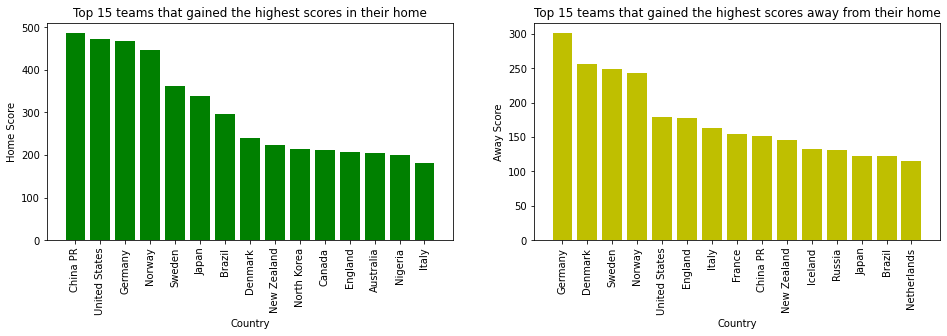

In [18]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.bar(x=home.head(15).index, height=list(home.head(15)),color='g')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Home Score')
plt.title('Top 15 teams that gained the highest scores in their home')

plt.subplot(1,2,2)
plt.bar(x=away.head(15).index, height=list(away.head(15)) ,color='y')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Away Score')
plt.title('Top 15 teams that gained the highest scores away from their home')

China PR has the highest home scores, and Germany has the highest away scores.

**3-2- What are the best 5 teams of all time regarding both the scores obtained in their home and away from their home**

In [19]:
data=pd.DataFrame({'total_home_scores':home ,'total_away_scores':away})

In [20]:
data.head(5)

,total_home_scores,total_away_scores
Albania,10.0,4.0
Algeria,24.0,20.0
American Samoa,0.0,0.0
Andorra,3.0,0.0
Angola,12.0,7.0


In [21]:
data.isnull().sum()

total_home_scores    4
total_away_scores    7
dtype: int64

In [22]:
data.fillna(0, inplace=True)

In [23]:
data['total_scores']= data['total_home_scores'] + data['total_away_scores']

In [24]:
data_sorted=data.sort_values(by='total_scores', ascending=False).head(5)

In [25]:
data_sorted.head(5)

,total_home_scores,total_away_scores,total_scores
Germany,468.0,301.0,769.0
Norway,446.0,243.0,689.0
United States,472.0,179.0,651.0
China PR,486.0,151.0,637.0
Sweden,362.0,249.0,611.0


Text(0.5, 1.0, 'The best 5 teams of all time')

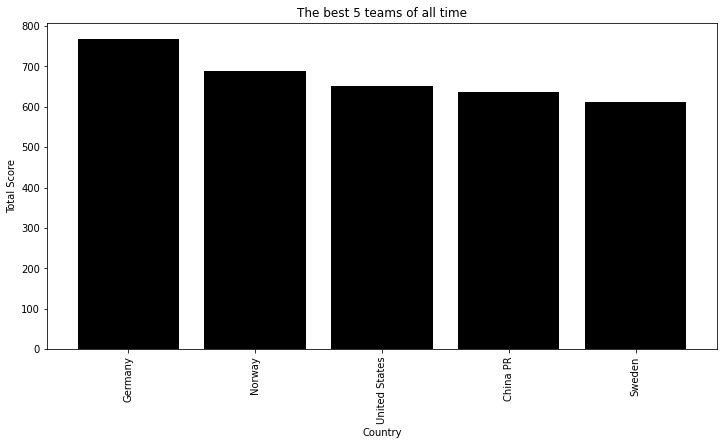

In [65]:
plt.figure(figsize=(12,6))

plt.bar(x=data_sorted.index, height=data_sorted['total_scores'],color='black')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Score')
plt.title('The best 5 teams of all time')

Germany is the best team of all time.

**3-3- In each year, what are the hisgest scores regarding both the scores obtained in  home and away from  home, and which countries obtained these scores in each year?**

In [33]:
country=[]
total_score=[]

for x in df['year'].unique():
    home=df[df['year']==x].groupby('home_team').sum()['home_score']
    away=df[df['year']==x].groupby('away_team').sum()['away_score']
    new=pd.DataFrame({'home_team':home ,'away_team':away})
    new.fillna(0, inplace=True)
    new['total']= new['home_team'] + new['away_team']
    total_sorted=new['total'].sort_values(ascending=False).head(1)
    country=country+list(total_sorted.index)
    total_score=total_score+list(total_sorted)

print('country:' , country)
print('\n')
print('total_score:' , total_score)

country: ['England', 'Australia', 'Chinese Taipei', 'Italy', 'Chinese Taipei', 'Chinese Taipei', 'Sweden', 'Thailand', 'Sweden', 'England', 'China PR', 'Hungary', 'Italy', 'Japan', 'Germany', 'United States', 'Norway', 'Japan', 'Germany', 'China PR', 'Norway', 'China PR', 'Brazil', 'China PR', 'United States', 'North Korea', 'Canada', 'North Korea', 'Germany', 'Germany', 'South Africa', 'Germany', 'United States', 'Germany', 'New Zealand', 'Germany', 'Germany', 'Jordan', 'New Zealand', 'Germany', 'Spain', 'Jordan', 'New Zealand', 'United States', 'Denmark']


total_score: [5.0, 12.0, 16.0, 9.0, 19.0, 20.0, 14.0, 25.0, 6.0, 17.0, 23.0, 7.0, 20.0, 37.0, 19.0, 74.0, 20.0, 29.0, 59.0, 57.0, 42.0, 45.0, 66.0, 76.0, 44.0, 53.0, 40.0, 53.0, 39.0, 26.0, 49.0, 47.0, 33.0, 28.0, 50.0, 33.0, 48.0, 30.0, 31.0, 51.0, 32.0, 37.0, 86.0, 31.0, 7.0]


In [34]:
df1= pd.DataFrame({'country':country,'total_score':total_score,'year':df['year'].unique()})

In [35]:
df1

,country,total_score,year
0,England,5.0,1969
1,Australia,12.0,1975
2,Chinese Taipei,16.0,1977
3,Italy,9.0,1979
4,Chinese Taipei,19.0,1980
5,Chinese Taipei,20.0,1981
6,Sweden,14.0,1982
7,Thailand,25.0,1983
8,Sweden,6.0,1984
9,England,17.0,1985


In [36]:
px.scatter_3d(df1,x='country', y='year',z='total_score')

We can see that the maximun total score was 86 and it was obtained by New zaland in 2018.

**3-4- What is the number of tournaments conducted per year**

In [37]:
new=[]
for x in df['year'].unique():
    new.append(df[df['year']==x]['tournament'].nunique())
print(new)

[1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 3, 2, 1, 4, 1, 8, 1, 4, 6, 7, 3, 3, 8, 5, 6, 3, 6, 7, 6, 4, 8, 6, 7, 4, 8, 4, 6, 4, 8, 4, 7, 6, 12, 4, 3]


Text(0.5, 1.0, 'Number of tournaments conducted per year')

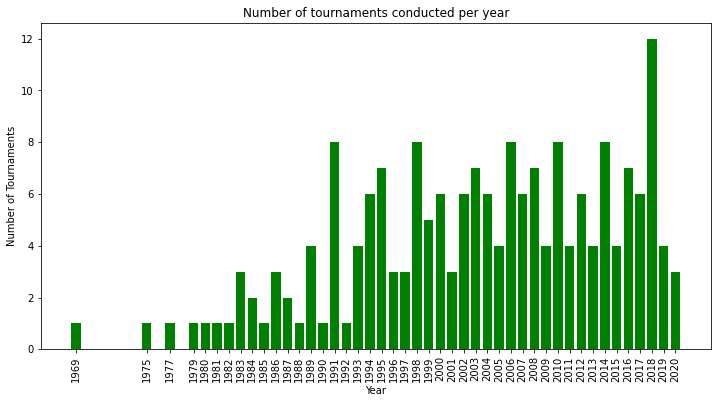

In [38]:
plt.figure(figsize=(12,6))
plt.bar(x=df['year'].unique(), height=new,color='green')
plt.xlabel('Year')
plt.ylabel('Number of Tournaments')
plt.xticks(ticks=df['year'].unique(),rotation=90)
plt.title('Number of tournaments conducted per year')

We can see that the maximun number of tournements conducted is 12 in year 2018.

**3-5- What are the most popular Tournaments ?**

In [42]:
new_list=[]
for x in df['tournament'].unique():
    new_list.append(df[df['tournament']==x]['year'].nunique())
print(new_list)

[2, 14, 26, 10, 13, 13, 3, 7, 8, 1, 27, 6, 18, 10, 6, 6, 6, 5, 5, 2, 1, 1, 1, 1]


Text(0, 0.5, 'Number')

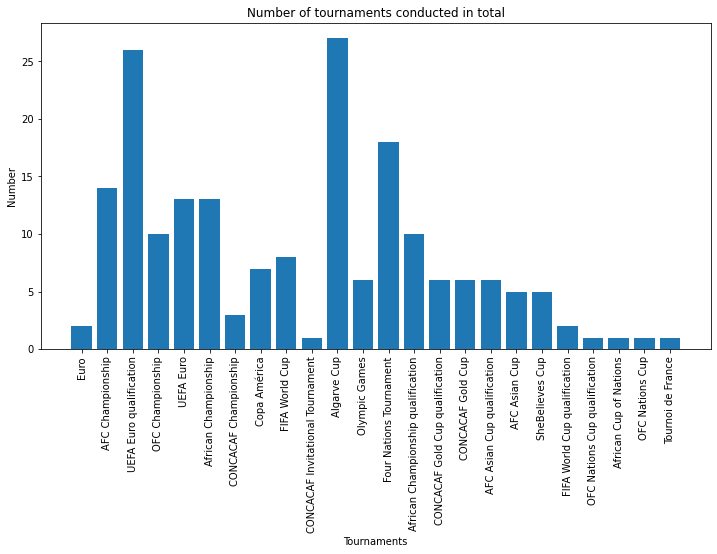

In [43]:
plt.figure(figsize=(12,6))
plt.bar(x=df['tournament'].unique(),height=[2, 14, 26, 10, 13, 13, 3, 7, 8, 1, 27, 6, 18, 10, 6, 6, 6, 5, 5, 2, 1, 1, 1, 1])
plt.xticks(rotation=90)
plt.title('Number of tournaments conducted in total')
plt.xlabel('Tournaments')
plt.ylabel('Number')


We observe that Algarve Cup is most popular and UEFA Euro qualification is the second most-popular tornament.

**3-6- What is the distribuition of home scores?**

Text(0.5, 1.0, 'Distribuition of home scores')

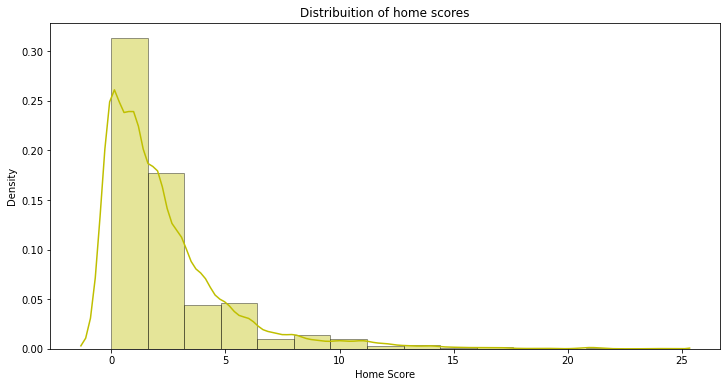

In [66]:
plt.figure(figsize=(12,6))
sns.distplot(df['home_score'],bins=15,color='y',hist_kws=dict(edgecolor='black'))
plt.xlabel('Home Score')
plt.ylabel('Density')
plt.title('Distribuition of home scores')

In [45]:
ff.create_distplot( hist_data=[df['home_score'].tolist()],group_labels = ['Home Score'],show_hist=False, show_rug=False)

**3-7- What is the distribuition of away scores?**

Text(0.5, 1.0, 'Distribuition of away scores')

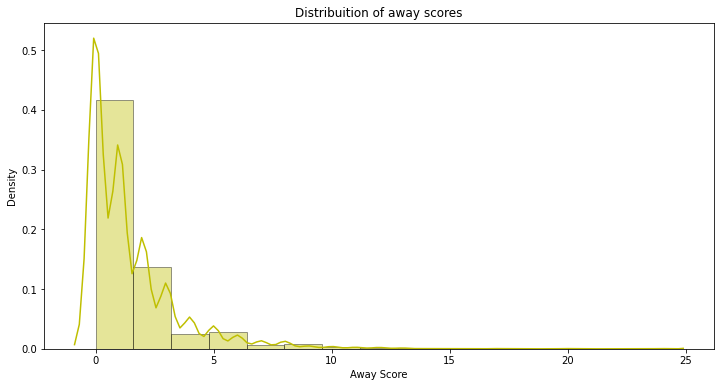

In [67]:
plt.figure(figsize=(12,6))
sns.distplot(df['away_score'],bins=15,color='y',hist_kws=dict(edgecolor='black'))
plt.xlabel('Away Score')
plt.ylabel('Density')
plt.title('Distribuition of away scores')

In [47]:
ff.create_distplot( hist_data=[df['away_score'].tolist()],group_labels = ['Away Score'],show_hist=False, show_rug=False)

**3-8- Comparison of Home and Away Scores**

In [ ]:
sns.kdeplot(df['home_score'])
sns.kdeplot(df['away_score'])

In [ ]:
ff.create_distplot( hist_data=[df['home_score'].tolist(),df['away_score'].tolist()],group_labels = ['Home Score', 'Away Score'],show_hist=False, show_rug=False)

We can see that the away scores starts at much higher number than home scores.

**3-9- What are the first 15 countries with the highest number of hosting the games?**

In [49]:
new_list=[]
for x in df['country'].unique():
    new_list.append(df[df['country']==x]['year'].nunique())
print(new_list)

[28, 5, 3, 2, 14, 25, 26, 19, 23, 20, 24, 26, 22, 25, 23, 24, 21, 30, 25, 4, 2, 21, 22, 3, 5, 12, 5, 20, 12, 10, 3, 3, 7, 1, 9, 16, 15, 21, 17, 3, 13, 3, 15, 14, 3, 10, 15, 13, 15, 4, 3, 11, 2, 7, 4, 14, 5, 4, 13, 10, 9, 4, 3, 7, 4, 5, 4, 2, 3, 1, 11, 10, 3, 1, 8, 7, 7, 3, 2, 1, 2, 8, 8, 8, 7, 8, 3, 2, 7, 4, 1, 3, 3, 8, 2, 4, 3, 3, 6, 1, 1, 2, 3, 1, 4, 1, 1, 1, 1, 3, 2, 2, 2, 5, 8, 1, 1, 5, 4, 2, 1, 4, 1, 1, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [50]:
df1=pd.DataFrame({'Country':df['country'].unique(),'Number of Hosting':new_list})

In [51]:
df1

,Country,Number of Hosting
0,Italy,28
1,Hong Kong,5
2,Chinese Taipei,3
3,India,2
4,Northern Ireland,14
...,...,...
139,North Korea,1
140,Chile,1
141,Gambia,1
142,Central African Republic,1


In [52]:
df2=df1.sort_values(by='Number of Hosting',ascending=False).head(15)

In [53]:
df2

,Country,Number of Hosting
17,Portugal,30
0,Italy,28
6,Norway,26
11,Sweden,26
18,Germany,25
13,Switzerland,25
5,Finland,25
15,Denmark,24
10,Belgium,24
8,England,23


Text(0.5, 1.0, 'Top 15 Countries with the highest number of hosting')

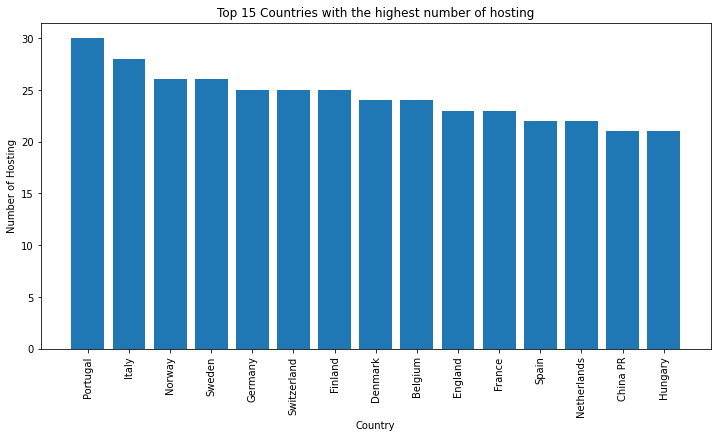

In [68]:
plt.figure(figsize=(12,6))
plt.bar(x=df2['Country'], height=df2['Number of Hosting'])
plt.xlabel('Country')
plt.ylabel('Number of Hosting')
plt.xticks(rotation=90)
plt.title('Top 15 Countries with the highest number of hosting')

We can see that Portugal hosted the highest number of games.

**3-10- Which countries host the most matches where they themselves are not participating in?**

In [69]:
only_host=[]
for x in df['country'].unique():
        df3=df[df['country']==x]
        only_host.append(df3[(df3['home_team']!=x) & (df3['away_team']!=x)]['date'].count())
    
print(only_host)

[16, 40, 33, 18, 0, 21, 7, 0, 12, 0, 0, 45, 25, 0, 50, 2, 0, 442, 40, 41, 26, 0, 0, 19, 0, 1, 39, 0, 30, 13, 17, 27, 0, 14, 11, 0, 17, 150, 3, 40, 129, 3, 0, 0, 0, 0, 0, 0, 0, 67, 8, 35, 0, 0, 0, 0, 3, 0, 0, 0, 3, 38, 0, 1, 14, 22, 0, 0, 0, 30, 3, 0, 0, 0, 0, 0, 0, 9, 1, 6, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 4, 45, 0, 0, 0, 3, 0, 0, 50, 0, 0, 1, 4, 0, 0, 0, 0, 1, 1, 10, 12, 1, 3, 6, 0, 0, 0, 13, 0, 4, 1, 0, 0, 26, 3, 4, 3, 17, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 10, 6, 19, 0, 0, 3]


In [70]:
df_host=pd.DataFrame({'Country':df['country'].unique(), 'Number of Only Hosting':only_host})

In [71]:
df_host_sorted=df_host.sort_values(by='Number of Only Hosting',ascending=False).head(15)

In [72]:
df_host_sorted

,Country,Number of Only Hosting
17,Portugal,442
37,China PR,150
40,United States,129
49,Canada,67
14,France,50
98,Vietnam,50
91,Ecuador,45
11,Sweden,45
19,Thailand,41
39,Malaysia,40


Text(0.5, 1.0, 'Top 15 Countries which hosted the highest number of matches without participating in the matches')

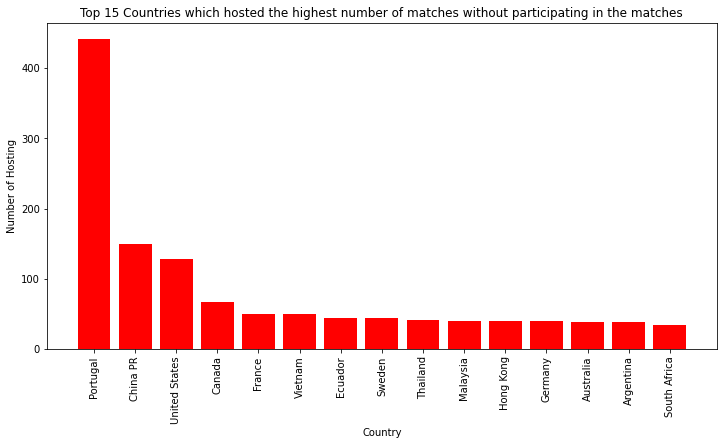

In [73]:
plt.figure(figsize=(12,6))
plt.bar(x=df_host_sorted['Country'], height=df_host_sorted['Number of Only Hosting'],color='r')
plt.xlabel('Country')
plt.ylabel('Number of Hosting')
plt.xticks(rotation=90)
plt.title('Top 15 Countries which hosted the highest number of matches without participating in the matches')

In [ ]:
We can see that Portugal hosted the highest number of games in which it did not played.

**3-11- How much, if at all, does hosting a major tournament help a country's chances in the tournament**

In [79]:
win=[]
lose=[]
equal=[]
for x in df['country'].unique():
    df4=df[df['country']==x]
    df5=df4[df4['home_team']==x]
    win.append(df5[df5['home_score']>df5['away_score']]['date'].count())
    lose.append(df5[df5['home_score']<df5['away_score']]['date'].count())
    equal.append(df5[df5['home_score']==df5['away_score']]['date'].count())
    
print('win:')
print(win)
print('\n')
print('lose:')
print(lose)
print('\n')
print('equal:')
print(equal)

win:
[44, 4, 7, 1, 3, 18, 44, 22, 34, 22, 25, 44, 32, 22, 34, 40, 17, 33, 49, 12, 5, 12, 22, 8, 5, 2, 12, 10, 25, 9, 9, 8, 2, 4, 9, 20, 5, 41, 20, 0, 48, 2, 14, 7, 0, 6, 10, 5, 17, 13, 4, 16, 0, 4, 3, 14, 4, 3, 13, 1, 4, 13, 2, 3, 11, 15, 0, 0, 1, 1, 4, 3, 1, 1, 2, 7, 7, 9, 2, 1, 2, 3, 13, 2, 5, 5, 0, 0, 5, 5, 2, 4, 0, 3, 1, 1, 3, 1, 14, 1, 1, 2, 4, 0, 4, 1, 0, 0, 0, 6, 5, 2, 2, 2, 4, 0, 1, 2, 1, 4, 1, 2, 1, 0, 0, 0, 1, 3, 1, 1, 0, 1, 2, 0, 3, 0, 0, 0, 1, 3, 3, 1, 0, 2]


lose:
[7, 10, 3, 0, 20, 17, 4, 14, 7, 14, 12, 4, 12, 20, 8, 7, 19, 84, 4, 3, 8, 22, 16, 3, 2, 14, 5, 18, 2, 3, 3, 2, 6, 1, 2, 9, 18, 19, 11, 5, 3, 4, 11, 17, 2, 14, 17, 16, 11, 2, 6, 7, 1, 6, 0, 9, 8, 4, 11, 17, 12, 1, 2, 2, 3, 0, 1, 2, 3, 3, 16, 16, 2, 0, 3, 3, 1, 0, 1, 3, 3, 5, 1, 3, 3, 3, 1, 2, 1, 1, 2, 5, 7, 11, 3, 6, 2, 1, 5, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 2, 11, 11, 1, 0, 5, 4, 0, 1, 3, 0, 0, 3, 4, 2, 3, 1, 1, 1, 8, 6, 2, 7, 4, 1, 1, 4, 0, 1, 1, 0, 0]


equal:
[9, 3, 0, 0, 2, 11, 7, 4, 9, 4, 12, 9, 7, 6,

In [80]:
df_chance=pd.DataFrame({'Host Country':df['country'].unique(), 'Number of Winning':win, 'Number of Loosing':lose, 'Number of Equal':equal})

Text(0.5, 1.0, 'Number of winning and loosings of the top 15 host countries')

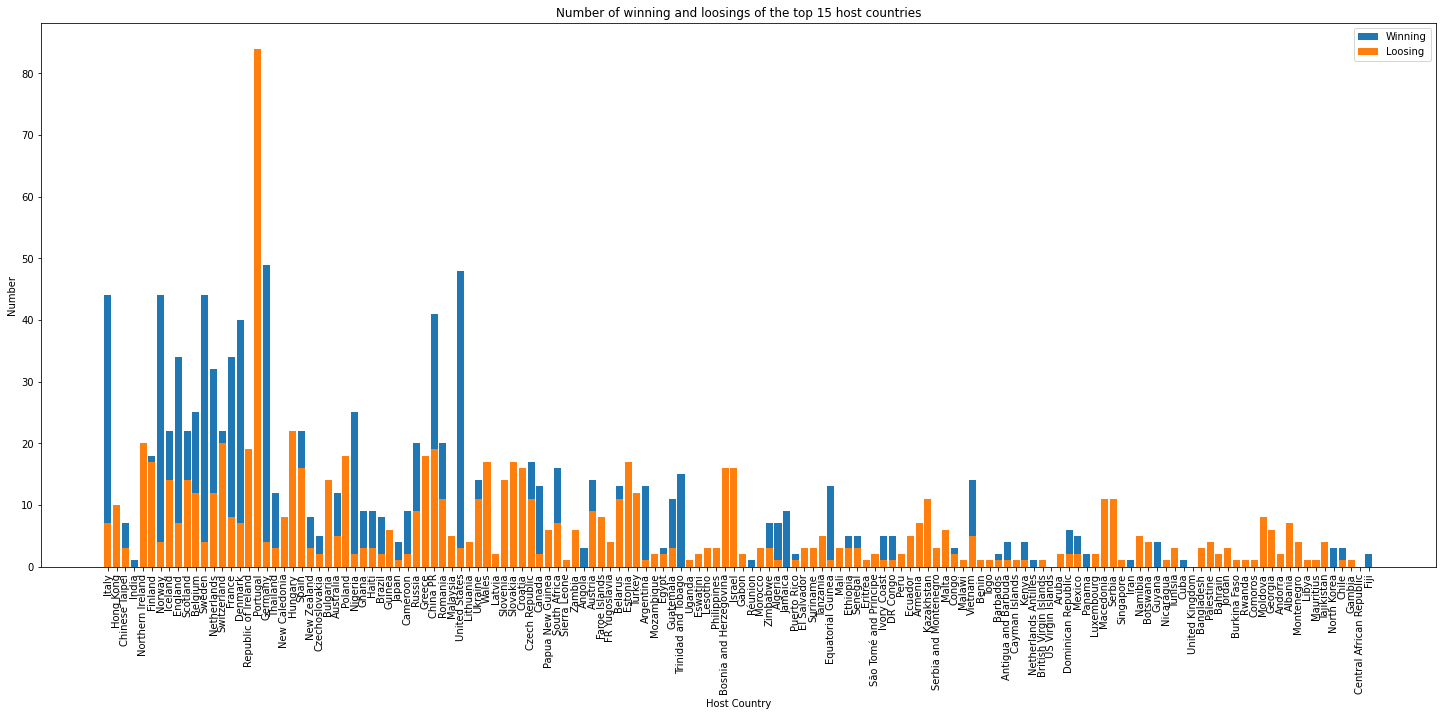

In [83]:
plt.figure(figsize=(25,10))

plt.bar(x=df_chance['Host Country'], height=df_chance['Number of Winning'])
plt.bar(x=df_chance['Host Country'], height=df_chance['Number of Loosing'])
plt.legend(['Winning','Loosing'])
plt.xlabel('Host Country')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.title('Number of winning and loosings of the top 15 host countries')

We see that except for Portugal and some other host countries, for other host countries, the number of winning was higher than the number of loosing. So we conclude that hosting can increase the winning chance of countries.

**3-12- 3D Scatter plots of home teams and away teams versus their home scores and away scores in each game**

In [84]:
px.scatter_3d(data_frame=df,x='home_score', y='away_score',z='away_team',color='home_team')